In [14]:
library(Seurat)
library(ggplot2)
library(stringr)
library(ggpubr)
library(viridis)
library(dplyr)
library(reshape2)
library(ggbeeswarm)
library(RColorBrewer)
library(ggrastr)

In [17]:
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8,colour = "black"), 
                     axis.text = element_text(size = 8,colour = "black"),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     legend.key.size = unit(.3, 'cm'),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(linewidth = .355), 
                    axis.ticks = element_line(linewidth = .177))


In [2]:
king.etal = read.csv('King_etal_Sci_Imm_2021/King_etal_cDNA_vs_VDJ.csv') 
dugan.etal = read.csv('Dugan_etal_Immunity_2021/Dugan_eta_cDNA_vs_VDJ.csv')
zurbuchen.etal = read.csv('Zurbuchen_etal_Nat_Imm_2023/Zurbuchen_etal_cDNA_vs_VDJ.csv') 
morgan.etal= read.csv('Morgan_seqwell/Morgan_eta_cDNA_vs_VDJ.csv') 
zhang300 = read.csv('Zhang_10x/Zhang_10X_3GEX_300.csv')
hek = readRDS('Morgan_seqwell/hek_recovery_summary.RDS') %>% mutate(X = rownames(.))

In [3]:
head(king.etal,1)
head(dugan.etal,1)
head(zurbuchen.etal,1)
head(morgan.etal,1)
head(zhang300,1)
head(hek,1)

,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,BCP3_MBC_AAACCTGAGTTACGGG,35,32,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021


,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,R125_AAACGGGTCTCAACTT-1,6,0,IGH,R125,10x 5`GEX - Dugan et al. 2021


,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,inf1_AAACCTGAGCGATTCT-1,2,0,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023


,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,B1_AAAAGAGCTAGT,1,3,IGH,B1,Seq-Well


,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,H1_AAACCCAAGGTCCGAA-1,7,0,IGH,H1,10x 3`GEX


,WTA,VDJ,chain,exp,project,X
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Y3_10,1,1,IGH,Y3,Seq-Well (HEK experiment),Y3_10


In [4]:
df.all = rbind(king.etal,dugan.etal,zurbuchen.etal,morgan.etal,zhang300,hek) 
table(df.all$project)


                        10x 3`GEX     10x 5`GEX - Dugan et al. 2021 
                            51388                            156939 
     10x 5`GEX - King et al. 2021 10x 5`GEX - Zurbuchen et al. 2023 
                           130950                             58458 
                         Seq-Well         Seq-Well (HEK experiment) 
                            74418                             10214 

In [7]:
head(df.all)

,X,WTA,VDJ,chain,exp,project
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,BCP3_MBC_AAACCTGAGTTACGGG,35,32,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
2,BCP3_MBC_AAAGATGTCTCACATT,45,40,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
3,BCP3_MBC_AAAGCAACACCAGATT,3254,2666,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
4,BCP3_MBC_AACACGTCAATGAATG,16,8,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
5,BCP3_MBC_AACCATGAGCGCCTTG,23,16,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
6,BCP3_MBC_AACCATGAGCGTTGCC,32,24,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021


In [8]:
write.csv(df.all,'Combined_cDNA_vs_VDJ.csv',row.names=FALSE)

In [6]:
# recovery plot
combined_cDNA_vs_VDJ = read.csv('Combined_cDNA_vs_VDJ.csv') 
head(combined_cDNA_vs_VDJ)

,X,WTA,VDJ,chain,exp,project
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,BCP3_MBC_AAACCTGAGTTACGGG,35,32,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
2,BCP3_MBC_AAAGATGTCTCACATT,45,40,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
3,BCP3_MBC_AAAGCAACACCAGATT,3254,2666,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
4,BCP3_MBC_AACACGTCAATGAATG,16,8,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
5,BCP3_MBC_AACCATGAGCGCCTTG,23,16,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021
6,BCP3_MBC_AACCATGAGCGTTGCC,32,24,IGH,BCP3_MBC,10x 5`GEX - King et al. 2021


In [7]:
combined_cDNA_vs_VDJ$project[combined_cDNA_vs_VDJ$project=='10x 5`GEX - Zurbuchen et al. 2023'] = '10x 5`VDJ - Zurbuchen et al.'
combined_cDNA_vs_VDJ$project[combined_cDNA_vs_VDJ$project=='10x 5`GEX - King et al. 2021'] = '10x 5`VDJ - King et al.'
combined_cDNA_vs_VDJ$project[combined_cDNA_vs_VDJ$project=='10x 5`GEX - Dugan et al. 2021'] = '10x 5`VDJ - Dugan et al.'
combined_cDNA_vs_VDJ$project[combined_cDNA_vs_VDJ$project=='Seq-Well'] = 'Seq-Well (PBMC experiment)'
combined_cDNA_vs_VDJ$project[combined_cDNA_vs_VDJ$project=='10x 3`GEX'] = '10x 3`GEX (PBMC experiment)'


In [8]:
unique(combined_cDNA_vs_VDJ$project)

[1] "10x 5`VDJ - King et al."      "10x 5`VDJ - Dugan et al."    
[3] "10x 5`VDJ - Zurbuchen et al." "Seq-Well (PBMC experiment)"  
[5] "10x 3`GEX (PBMC experiment)"  "Seq-Well (HEK experiment)"

In [9]:
df4gg = combined_cDNA_vs_VDJ %>%
mutate(Recovery = ifelse(VDJ>0, 'Recovery', 'No Recovery')) # add recovery status

df4gg$project = factor(df4gg$project,levels=c('10x 5`VDJ - Dugan et al.','10x 5`VDJ - King et al.',
                                              '10x 5`VDJ - Zurbuchen et al.',
                                              '10x 3`GEX (PBMC experiment)','Seq-Well (PBMC experiment)',
                                              'Seq-Well (HEK experiment)'))
df4gg = df4gg %>%
mutate(chain=ifelse(chain == 'IGH', 'Heavy Chain', 'Light Chain')) 

In [10]:
## Binning the WTA counts
df4gg$WTA.bin = cut(df4gg$WTA, c(-Inf,0,1,2,3,4,5,10,20,30,50,Inf)) 
# calculate fraction of recovery / no recovery 
df4gg = df4gg %>%
group_by(chain, project, exp, WTA.bin, Recovery) %>% summarise(n=n()) %>% ungroup() %>%
group_by(chain, project, exp, WTA.bin) %>% mutate(total = sum(n), frac = n/total) %>% ungroup()

`summarise()` has grouped output by 'chain', 'project', 'exp', 'WTA.bin'. You
can override using the `.groups` argument.


In [11]:
# calculate mean for recovered 
df4gg2 = df4gg %>% filter(Recovery == 'Recovery') %>% 
group_by(chain,project,WTA.bin) %>% 
summarise(mean.frac = mean(frac), std = sd(frac), se = std/sqrt(n())) %>% ungroup()

`summarise()` has grouped output by 'chain', 'project'. You can override using
the `.groups` argument.


In [15]:
# make color palettes
blues=brewer.pal(9,'YlGnBu')  
reds=brewer.pal(9,'Reds')  


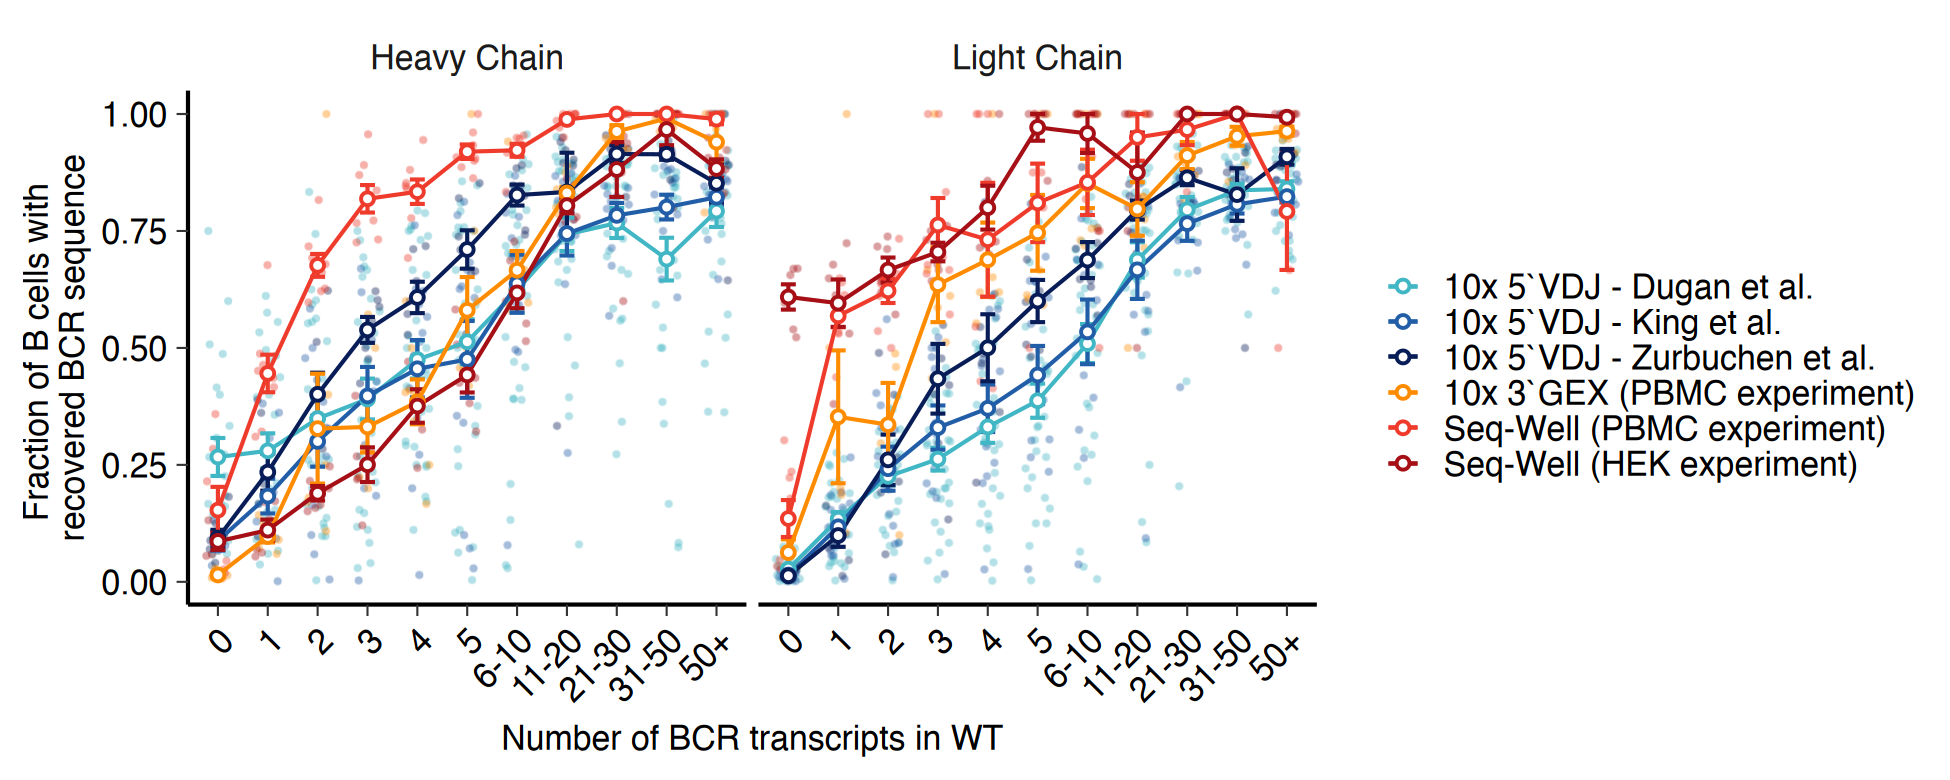

In [18]:
options(repr.plot.width=6.5, repr.plot.height=2.6, repr.plot.res=300)

col = c(blues[5],blues[7],blues[9],'darkorange',reds[6],reds[8])
# clustering fraction 
df4gg2 %>% 
ggplot(aes(x=WTA.bin, y=mean.frac,color=project)) + theme_classic() +
geom_jitter_rast(data = df4gg%>% filter(Recovery == 'Recovery') , 
                 aes(x=WTA.bin, y=frac,color=project), 
                 size=0.8, width=0.25,stroke=0, alpha=0.4) + 
geom_errorbar(aes(group=project, ymin=mean.frac-se, ymax=mean.frac+se, color=project),width=0.3, linewidth=0.35, alpha=1)+
geom_line(aes(group=project, color=project),linewidth=0.35) +
geom_point(shape=21,fill='white',size=1) + 
scale_color_manual(values=col) +
scale_fill_manual(values=col) +
scale_x_discrete(labels=c(as.character(seq(0,5)),'6-10','11-20','21-30','31-50','50+'))+ 
facet_wrap('chain') + 
labs(y='Fraction of B cells with \nrecovered BCR sequence', 
     x='Number of BCR transcripts in WT',color='', fill='')+
Axis_themes+
theme(panel.spacing = unit(0.2, "lines"),strip.background=element_blank(),
      axis.text.x=element_text(angle=45,hjust=1,color = "black"),
      legend.key.size = unit(.3, 'cm')) 

out = 'figures/10x_recovery_probability_3.pdf'
ggsave(out,device='pdf', height = 2.6, width = 6.5,
       dpi = 300,useDingbats = FALSE)

In [19]:
# have boolean columns for recovery: none, heavy, light, paried 
# only keep B cells
zurbuchen = read.csv('Zurbuchen_etal_Nat_Imm_2023/Zurbuchen_etal_metadata_recovery_labeled.csv',row.names=1)%>%filter(!cell.type %in% c('Non-B cell')) %>% mutate(dataset='Zurbuchen et al.')
dugan = read.csv('Dugan_etal_Immunity_2021/Dugan_etal_metadata_recovery_labeled.csv',row.names=1) %>% filter(!cell.type %in% c('Non-B cell'), !orig.ident %in% c('S210V2','S266V2','S407V2','S356V2')) %>% mutate(dataset='Dugan et al.')
king = read.csv('King_etal_Sci_Imm_2021/King_etal_metadata_recovery_labeled.csv',row.names=1) %>% filter(Lineage=='B Cells',! sample %in% c('BCP2_Total')) %>% mutate(orig.ident=sample, cell.type=CellType,dataset='King et al.')

In [20]:
# need to make boolean columns for recovery 
# only keep B cells
morgan = read.csv('Morgan_seqwell/Morgan_etal_metadata_recovery_labeled.csv',row.names=1) %>% 
filter(!cluster_name%in%c('Non-B cell'))%>% 
mutate(cell.type=cluster_name,dataset='Seq-Well (PBMC experiment)')
zhang = read.csv('Zhang_10x/Zhang_10x3_metadata_recovery_labeled.csv',row.names=1) %>% 
filter(!bcelltype%in%c('Non-B cell'))%>% 
mutate(cell.type=bcelltype,dataset='10x 3`GEX (PBMC experiment)')

In [21]:
morgan = morgan %>% mutate(none = ifelse(IGL_recovery==0 & IGH_recovery==0,1,0),
                           heavy = ifelse(IGH_recovery==1,1,0),
                           light = ifelse(IGL_recovery==1,1,0),
                           paired = ifelse(IGL_recovery==1 & IGH_recovery==1,1,0),
                           )
zhang = zhang %>% mutate(none = ifelse(light.recovery==0 & heavy.recovery==0,1,0),
                           heavy = ifelse(heavy.recovery==1,1,0),
                           light = ifelse(light.recovery==1,1,0),
                           paired = ifelse(light.recovery==1 & heavy.recovery==1,1,0),
                           )

In [22]:
df1 = zurbuchen %>% select(orig.ident,dataset,cell.type,none,heavy,light,paired)
df2 = dugan %>% select(orig.ident,dataset,cell.type,none,heavy,light,paired)
df3 = king %>% select(orig.ident,dataset,cell.type,none,heavy,light,paired)
df4 = morgan %>% select(orig.ident,dataset,cell.type,none,heavy,light,paired)
df5 = zhang %>% select(orig.ident,dataset,cell.type,none,heavy,light,paired)

In [24]:
hek = readRDS('Morgan_seqwell/hek_recovery_summary.RDS')
hek = hek %>% mutate(X=rownames(.), X=ifelse(chain!='IGH',substr(X,1,nchar(X)-1),X))
heavy = hek %>% filter(chain=='IGH') %>% mutate(heavy=ifelse(VDJ==0,0,1))
light = hek %>% filter(chain!='IGH') %>% mutate(light=ifelse(VDJ==0,0,1))
df6 = heavy %>% select(heavy)
df6$orig.ident = heavy$exp
df6$dataset = 'Seq-Well (HEK experiment)'
df6$cell.type = 'Bcell'
df6$light = light$light[match(rownames(df6),light$X)]
df6 = df6 %>% mutate(none=ifelse(heavy+light==0, 1, 0), 
                     paired = ifelse(heavy + light ==2, 1, 0))
head(df6)

,heavy,orig.ident,dataset,cell.type,light,none,paired
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Y3_10,1,Y3,Seq-Well (HEK experiment),Bcell,1,0,1
Y3_17,0,Y3,Seq-Well (HEK experiment),Bcell,0,1,0
Y3_22,1,Y3,Seq-Well (HEK experiment),Bcell,1,0,1
Y3_26,1,Y3,Seq-Well (HEK experiment),Bcell,1,0,1
Y3_32,1,Y3,Seq-Well (HEK experiment),Bcell,0,0,0
Y3_35,0,Y3,Seq-Well (HEK experiment),Bcell,0,1,0


In [26]:
# all b cells 
combined.df = rbind(df1,df2,df3,df4,df5,df6)
none = combined.df %>% count(dataset,orig.ident,none) %>% group_by(dataset,orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = combined.df %>% count(dataset,orig.ident,heavy) %>% group_by(dataset,orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = combined.df %>% count(dataset,orig.ident,light) %>% group_by(dataset,orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = combined.df %>% count(dataset,orig.ident,paired) %>% group_by(dataset,orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)

df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')
allbcell = rbind( df1,df2, df3, df4) 
allbcell$cell.type = 'All B cells'

In [27]:

df4gg = allbcell
df4gg2 = allbcell %>% group_by(dataset,recovery,cell.type) %>% 
summarize(mean.frac= mean(frac),sd.frac=sd(frac),se.frac=sd.frac/sqrt(n())) %>% replace(is.na(.),0)

df4gg$dataset = factor(df4gg$dataset,levels=c('Dugan et al.','King et al.','Zurbuchen et al.',
                                              '10x 3`GEX (PBMC experiment)',
                                              'Seq-Well (PBMC experiment)',
                                              'Seq-Well (HEK experiment)'))
df4gg2$dataset = factor(df4gg2$dataset,levels=c('Dugan et al.','King et al.','Zurbuchen et al.',
                                                '10x 3`GEX (PBMC experiment)',
                                                'Seq-Well (PBMC experiment)',
                                                'Seq-Well (HEK experiment)'))
# make color palettes
blues=brewer.pal(9,'YlGnBu') 
reds=brewer.pal(9,'Reds') 

`summarise()` has grouped output by 'dataset', 'recovery'. You can override
using the `.groups` argument.


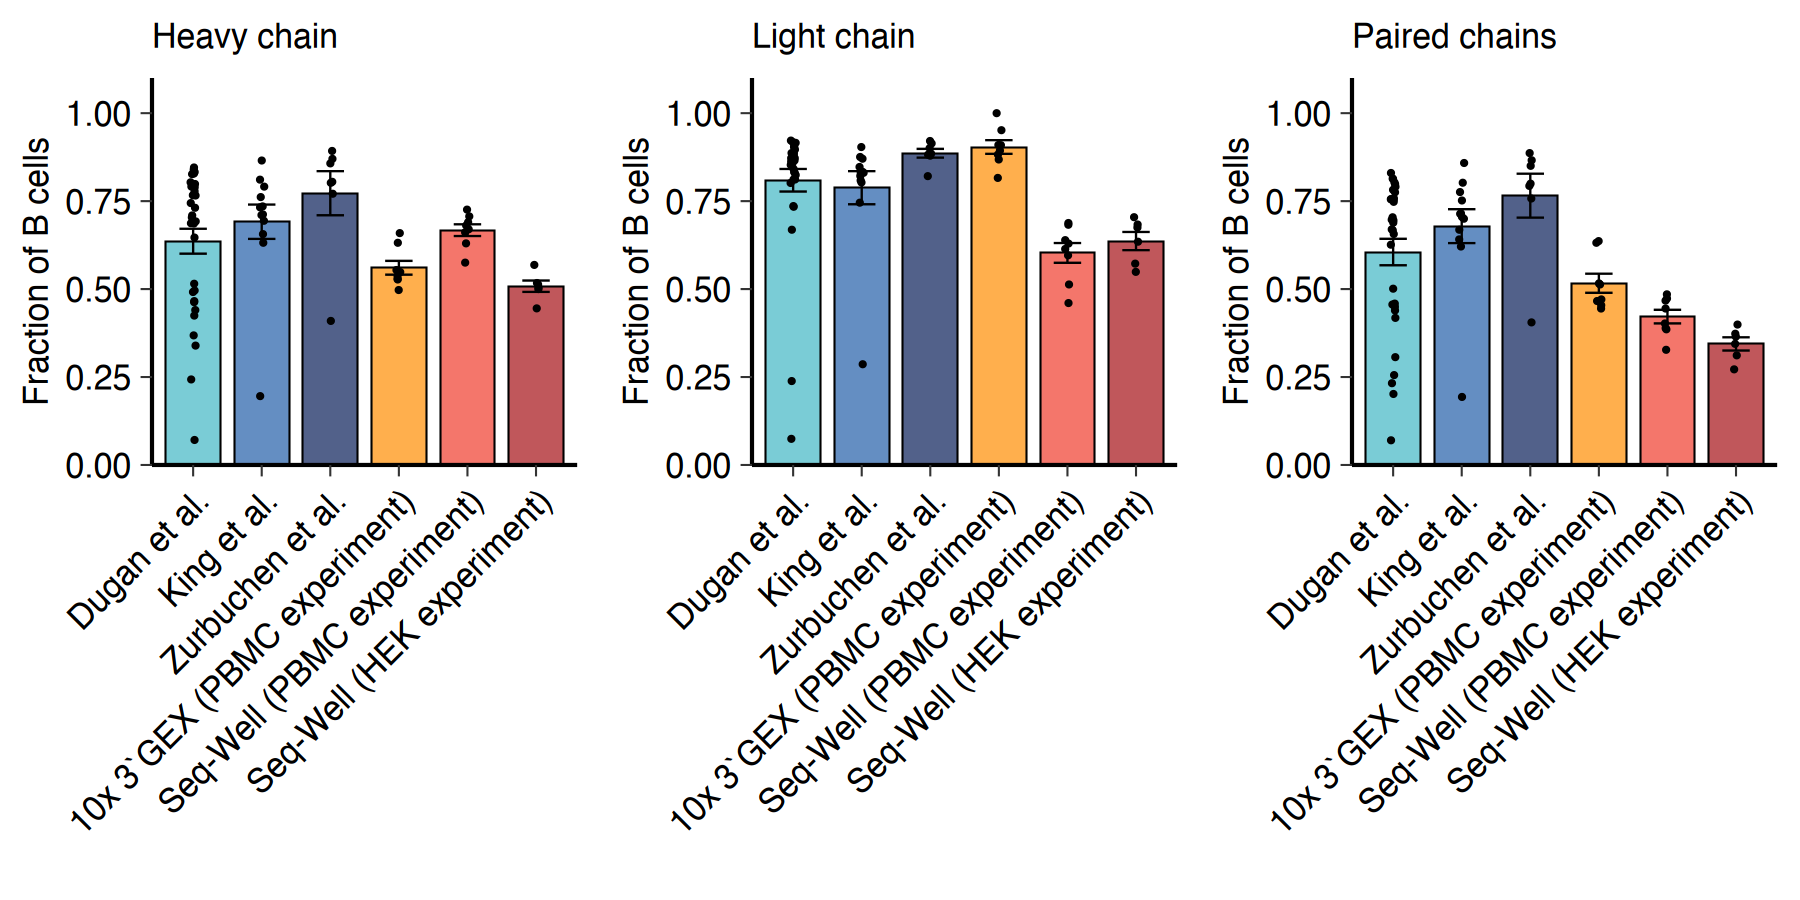

In [28]:
options(repr.plot.width=6,repr.plot.height=3,repr.plot.res=300)
dodgewidth=0.8
col = alpha(c(blues[5],blues[7],blues[9],'darkorange',reds[6],reds[8]),0.7)

g1 = df4gg2 %>% filter(recovery=='Heavy') %>% 
ggplot(aes(x=dataset,fill=dataset)) + theme_classic()+ 
geom_bar(aes(y=mean.frac),stat='identity', position='dodge', color = 'black', linewidth = .177,width=0.8) + 
geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),width=0.4,
              position = position_dodge(width = dodgewidth),linewidth=0.2)+

geom_point(data=df4gg %>% filter(recovery=='Heavy'), aes(x=dataset, y=frac), size= 0.5, color = 'black',stroke=0.2,
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .3))+

labs(title='Heavy chain',x='',y='Fraction of B cells',fill='BCR recovery') + 
scale_fill_manual(values = col) +
scale_y_continuous(expand=c(0,0),lim=c(0,1.1)) + 
Axis_themes +NoLegend() +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

g2 = df4gg2 %>% filter(recovery=='Light') %>% 
ggplot(aes(x=dataset,fill=dataset)) + theme_classic()+ 
geom_bar(aes(y=mean.frac),stat='identity', position='dodge', color = 'black', linewidth = .177,width=0.8) + 
geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),width=0.4,
              position = position_dodge(width = dodgewidth),linewidth=0.2)+

geom_point(data=df4gg %>% filter(recovery=='Light'), aes(x=dataset, y=frac), size= 0.5, color = 'black',stroke=0.2,
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .3))+

labs(title='Light chain',x='',y='Fraction of B cells',fill='BCR recovery') + 
scale_fill_manual(values = col) +
scale_y_continuous(expand=c(0,0),lim=c(0,1.1)) + 
Axis_themes +NoLegend() +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

g3 = df4gg2 %>% filter(recovery=='Paired') %>% 
ggplot(aes(x=dataset,fill=dataset)) + theme_classic()+ 
geom_bar(aes(y=mean.frac),stat='identity', position='dodge', color = 'black', linewidth = .177,width=0.8) + 


geom_point(data=df4gg %>% filter(recovery=='Paired'), aes(x=dataset, y=frac), size= 0.5, color = 'black',stroke=0.2,
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .3))+

geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),width=0.4,
              position = position_dodge(width = dodgewidth),linewidth=0.2)+
labs(title='Paired chains',x='',y='Fraction of B cells',fill='BCR recovery') + 
scale_fill_manual(values = col) +
scale_y_continuous(expand=c(0,0),lim=c(0,1.1)) + 
Axis_themes + NoLegend() +
theme(axis.text.x=element_text(angle=45,hjust=1),      
      legend.key.size = unit(.3, 'cm'))

cowplot::plot_grid(g1, g2, g3, ncol = 3)

# out = 'figures/barplot_recovery.pdf'
# ggsave(out,device='pdf', height = 3, width = 6,
#        dpi = 300,useDingbats = FALSE)

In [32]:
# average recovery for 5`
# df4gg2 %>% ungroup() %>% filter(as.character(dataset)%in% c('Dugan et al.','King et al.','Zurbuchen et al.')) %>%
# group_by(recovery) %>% summarise(mean.frac=mean(mean.frac))

In [33]:
# average recovery for 3` GEX
# df4gg2 %>% ungroup() %>% filter(!as.character(dataset)%in% c('Dugan et al.','King et al.','Zurbuchen et al.')) %>% 
# mutate(platform = str_split_i(as.character(dataset),' \\(',1)) %>% 
# group_by(platform,recovery) %>% summarise(mean.frac=mean(mean.frac))

In [34]:
# average recovery for Seq well
# df4gg2 %>% ungroup() %>% mutate(platform = str_split_i(as.character(dataset),' \\(',1)) %>% 
# filter(platform == 'Seq-Well')